# 9. Redes Neurais Recorrentes

Até agora, focamos principalmente em dados de comprimento fixo (cap3 - Redes para Regressão;
cap4 - Redes para Classificação e cap5 - Perceptrons Multicamadas)

Esses conjuntos de dados são às vezes chamados de tabulares , porque podem ser organizados em tabelas, onde cada exemplo
obtém sua própria linha, e cada atributo obtém sua própria coluna. 

Posteriormente, na Seção 7 , passamos para os dados de imagem, onde as entradas consistem nos valores brutos de pixel em cada coordenada em uma imagem. 
Os dados de imagem dificilmente se encaixavam no perfil de um conjunto de dados tabular protípico. Lá, precisávamos recorrer a 
redes neurais convolucionais (CNNs) para lidar com a estrutura hierárquica e as invariâncias. No entanto, nossos dados ainda eram de comprimento fixo. 
Cada imagem Fashion-MNIST é representada como uma grade de valores de pixel.
Além disso, nosso objetivo era desenvolver um modelo que olhasse para apenas uma imagem e então produzisse uma única previsão
Mas o que devemos fazer quando nos deparamos com uma sequência de imagens, como em um vídeo?


Muitas tarefas de aprendizagem exigem lidar com dados sequenciais. Legendagem de imagens, síntese de fala e geração de música exigem que
 os modelos produzam saídas consistindo em sequências. Em outros domínios, como previsão de séries temporais, análise de vídeo e recuperação
 de informações musicais, um modelo deve aprender com entradas que são sequências. 

Dados estruturados sequencialmente.

Redes neurais recorrentes (RNNs) são modelos de aprendizado profundo que capturam a dinâmica de sequências por meio de conexões recorrentes , que podem ser consideradas ciclos na rede de nós. Isso pode parecer contraintuitivo a princípio. Afinal, é a natureza de feedforward das redes neurais que torna a ordem da computação inequívoca. No entanto, as arestas recorrentes são definidas de uma forma precisa que garante que nenhuma ambiguidade possa surgir. Redes neurais recorrentes são desenroladas em etapas de tempo (ou etapas de sequência), com os mesmos parâmetros subjacentes aplicados em cada etapa. Enquanto as conexões padrão são aplicadas de forma síncrona para propagar as ativações de cada camada para a camada subsequente na mesma etapa de tempo , as conexões recorrentes são dinâmicas , passando informações em etapas de tempo adjacentes. Como a visão desdobrada na Fig. 9.1 revela, as RNNs podem ser consideradas redes neurais de feedforward, onde os parâmetros de cada camada (convencionais e recorrentes) são compartilhados em etapas de tempo.

Também observamos que a sequencialidade não é exclusiva das RNNs. Por exemplo, as CNNs que já introduzimos podem ser adaptadas para lidar com dados de comprimento variável, por exemplo, imagens de resolução variável.

Além disso, as RNNs recentemente cederam considerável participação de mercado para modelos Transformer (cap11).

No entanto, as RNNs ganharam destaque como modelos padrão para lidar com estruturas sequenciais complexas em aprendizado profundo e continuam sendo modelos básicos para modelagem sequencial até hoje.

Um insight fundamental abriu caminho para uma revolução na modelagem de sequências. Embora as entradas e alvos para muitas tarefas fundamentais em aprendizado de máquina não possam ser facilmente representados como vetores de comprimento fixo, eles podem, no entanto, ser representados como sequências de comprimento variável de vetores de comprimento fixo.
Por exemplo,  vídeos podem ser representados como sequências de comprimento variável de imagens estáticas.



# 9.1. Trabalhando com sequências

- __Até agora, nos concentramos em modelos cujas entradas consistiam em um único vetor de características.__

- __A principal mudança de perspectiva ao desenvolver modelos capazes de processar sequências é que agora nos concentramos em entradas que consistem em uma lista ordenada de vetores de características.__

Alguns conjuntos de dados consistem em uma única sequência massiva. Considere, por exemplo, os fluxos extremamente longos de leituras de sensores que podem estar disponíveis para cientistas do clima. Em tais casos, podemos criar conjuntos de dados de treinamento amostrando aleatoriamente subsequências de algum comprimento predeterminado.

 Embora ainda assumamos que sequências inteiras (por exemplo, documentos inteiros ou trajetórias de pacientes) são amostradas de forma independente, não podemos assumir que os dados que chegam em cada passo de tempo são independentes uns dos outros (dependem dos dados anteriores).

 Essas tarefas de sequência para sequência assumem duas formas: (i) alinhado: onde a entrada em cada passo de tempo se alinha com um alvo correspondente (por exemplo, marcação de classe gramatical); (ii) desalinhado: onde a entrada e o alvo não necessariamente exibem uma correspondência passo a passo (por exemplo, tradução automática).

 Antes de nos preocuparmos em lidar com alvos de qualquer tipo, podemos abordar o problema mais direto: modelagem de densidade não supervisionada (também chamada de modelagem de sequência ). Aqui, __dada uma coleção de sequências, nosso objetivo é estimar a função de massa de probabilidade que nos diz a probabilidade de vermos qualquer sequência dada.__

In [1]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

# 9.1.1. Modelos autorregressivos

Tais modelos que regridem o valor de um sinal nos valores anteriores desse mesmo sinal são naturalmente chamados de modelos autorregressivos .

Há apenas um grande problema: o número de entradas varia, dependendo de t. Em outras palavras, o número de entradas aumenta com a quantidade de dados que encontramos.

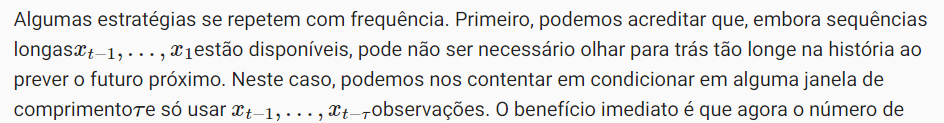

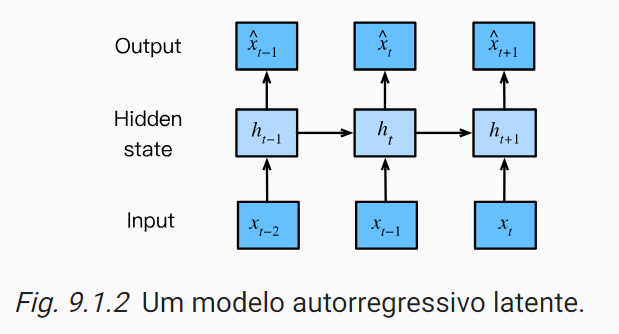



# 9.1.2. Modelos de sequência

Às vezes, especialmente ao trabalhar com linguagem, desejamos estimar a probabilidade conjunta de uma sequência inteira. Esta é uma tarefa comum ao trabalhar com sequências compostas de tokens discretos , como palavras. Geralmente, essas funções estimadas são chamadas de modelos de sequência e, para dados de linguagem natural, são chamadas de modelos de linguagem .

# 9.1.2.1. Modelos de Markov

Sempre que podemos jogar fora a história além do anterior T passos sem qualquer perda no poder preditivo, dizemos que a sequência satisfaz uma condição de Markov, ou seja, que o futuro é condicionalmente independente do passado, dada a história recente.

Muitas vezes achamos útil trabalhar com modelos que procedem como se uma condição de Markov fosse satisfeita, mesmo quando sabemos que isso é apenas aproximadamente verdadeiro. Com documentos de texto reais, continuamos a ganhar informações à medida que incluímos mais e mais contexto à esquerda. Mas esses ganhos diminuem rapidamente. Assim, às vezes fazemos concessões, evitando dificuldades computacionais e estatísticas ao treinar modelos cuja validade depende de uma condição de Markov.

Mesmo os modelos de linguagem massivos de RNN e Transformer de hoje raramente incorporam mais do que milhares de palavras de contexto.

# 9.1.2.2. A Ordem da Decodificação

Você pode estar se perguntando por que representamos a fatoração de uma sequência de texto como uma cadeia da esquerda para a direita de probabilidades condicionais. Por que não da direita para a esquerda ou alguma outra ordem aparentemente aleatória? Em princípio, não há nada de errado em desdobrar
em ordem reversa. O resultado é uma fatoração válida.

No entanto, há muitas razões pelas quais fatorar o texto na mesma direção em que o lemos (da esquerda para a direita para a maioria dos idiomas, mas da direita para a esquerda para árabe e hebraico) é preferível para a tarefa de modelagem de linguagem. Primeiro, essa é apenas uma direção mais natural para pensarmos. Afinal, todos nós lemos texto todos os dias, e esse processo é guiado por nossa capacidade de antecipar quais palavras e frases provavelmente virão a seguir. Pense em quantas vezes você completou a frase de outra pessoa. Assim, mesmo que não tivéssemos outra razão para preferir essas decodificações em ordem, elas seriam úteis apenas porque temos melhores intuições sobre o que deve ser provável ao prever nessa ordem.

Terceiro, temos modelos preditivos mais fortes para prever palavras adjacentes do que palavras em outros locais arbitrários. Embora todas as ordens de fatoração sejam válidas, elas não necessariamente representam problemas de modelagem preditiva igualmente fáceis.



# 9.1.3. Treinamento

Antes de focar nossa atenção nos dados de texto, vamos primeiro tentar isso com alguns dados sintéticos de valor contínuo.

Aqui, nossos 1000 dados sintéticos seguirão a sin função trigonométrica, aplicada a 0,01 vezes o passo de tempo. Para tornar o problema um pouco mais interessante, corrompemos cada amostra com ruído aditivo. Dessa sequência, extraímos exemplos de treinamento, cada um consistindo de recursos e um rótulo.



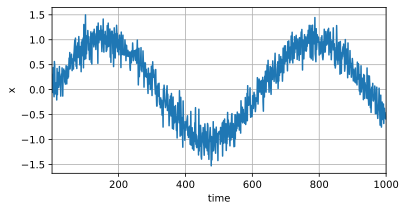

In [2]:
class Data(d2l.DataModule):
    def __init__(self, batch_size=16, T=1000, num_train=600, tau=4):
        self.save_hyperparameters()
        self.time = torch.arange(1, T + 1, dtype=torch.float32)       #  cria sequência de 1 até 1000.
        self.x = torch.sin(0.01 * self.time) + torch.randn(T) * 0.2   # cria a onda senoidal + ruido.

data = Data()
d2l.plot(data.time, data.x, 'time', 'x', xlim=[1, 1000], figsize=(6, 3))

Para começar, tentamos um modelo que atua como se os dados satisfizessem uma condição de Markov de ordem e, portanto, prevê xt
usando apenas o passado com 'tal' observações.

O conjunto de dados resultante contém T-'tal' exemplos, onde __cada entrada para o modelo tem comprimento de sequência 'tal'__. Criamos um iterador de dados nos primeiros 600 exemplos, cobrindo um período da função sin.


In [4]:
@d2l.add_to_class(Data)
def get_dataloader(self, train):
    features = [self.x[i : self.T-self.tau+i] for i in range(self.tau)]      # Sendo tau=600. Tem-se 600 listas com tensores com 400 elementos
    self.features = torch.stack(features, 1)                                 # converte as listas para um tensor(400,600)  
    self.labels = self.x[self.tau:].reshape((-1, 1))                         # tensor (400,1)
    i = slice(0, self.num_train) if train else slice(self.num_train, None)
    return self.get_tensorloader([self.features, self.labels], train, i)

Neste exemplo, nosso modelo será uma regressão linear padrão.



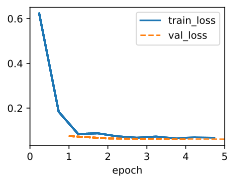

In [5]:
model = d2l.LinearRegression(lr=0.01)
trainer = d2l.Trainer(max_epochs=5)
trainer.fit(model, data)

# 9.1.4. Previsão

Para avaliar nosso modelo, primeiro verificamos seu desempenho na previsão de um passo à frente.

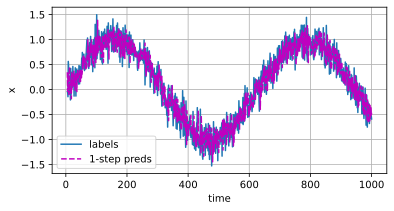

In [6]:
onestep_preds = model(data.features).detach().numpy()
d2l.plot(data.time[data.tau:], [data.labels, onestep_preds], 'time', 'x',
         legend=['labels', '1-step preds'], figsize=(6, 3))

Essas previsões parecem boas, mesmo perto do fim t=1000.

Mas e se observássemos apenas os dados da sequência até o passo de tempo 604 e desejássemos fazer previsões vários passos no futuro?
Infelizmente, não podemos calcular diretamente a previsão de um passo à frente para o passo de tempo 609, porque não conhecemos as entradas correspondentes.

Podemos resolver esse problema inserindo nossas previsões anteriores como entradas em nosso modelo para fazer previsões subsequentes, projetando para frente, __um passo de cada vez__, até atingir o passo de tempo desejado.

Em outras palavras, __teremos que continuar usando nossas próprias previsões para fazer previsões multistep-ahead.__



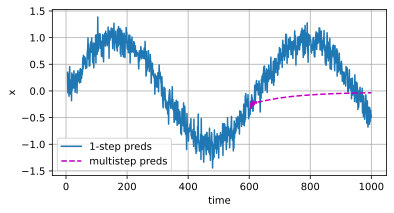

In [7]:
multistep_preds = torch.zeros(data.T)
multistep_preds[:] = data.x
for i in range(data.num_train + data.tau, data.T):
    multistep_preds[i] = model(
        multistep_preds[i - data.tau:i].reshape((1, -1)))
multistep_preds = multistep_preds.detach().numpy()

d2l.plot([data.time[data.tau:], data.time[data.num_train+data.tau:]],
         [onestep_preds, multistep_preds[data.num_train+data.tau:]], 'time',
         'x', legend=['1-step preds', 'multistep preds'], figsize=(6, 3))

Infelizmente, neste caso falhamos espetacularmente. As previsões decaem para uma constante muito rapidamente após alguns passos. Por que o algoritmo teve um desempenho muito pior ao prever mais para o futuro? Em última análise, isso se deve ao fato de que os erros se acumulam.

Vamos analisar mais de perto as dificuldades em k-previsões passo a passo ao calcular previsões em toda a sequência para k=1,4,16,64. 
.

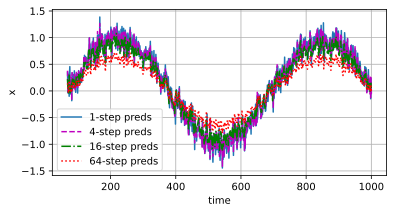

In [11]:
def k_step_pred(k):
    features = []
    for i in range(data.tau):
        features.append(data.x[i : i+data.T-data.tau-k+1])
    # The (i+tau)-th element stores the (i+1)-step-ahead predictions
    for i in range(k):
        preds = model(torch.stack(features[i : i+data.tau], 1))
        features.append(preds.reshape(-1))
    return features[data.tau:]

steps = (1, 4, 16, 64)
preds = k_step_pred(steps[-1])
d2l.plot(data.time[data.tau+steps[-1]-1:],
         [preds[k - 1].detach().numpy() for k in steps], 'time', 'x',
         legend=[f'{k}-step preds' for k in steps], figsize=(6, 3))

Isso ilustra claramente como a qualidade da previsão muda conforme tentamos prever mais para o futuro. Enquanto as previsões de 4 passos à frente ainda parecem boas, qualquer coisa além disso é quase inútil.

# 9.1.5. Resumo

Há uma grande diferença em dificuldade entre interpolação e extrapolação. Consequentemente, se você tiver uma sequência, sempre respeite a ordem temporal dos dados ao treinar, ou seja, nunca treine em dados futuros.

Para modelos causais (por exemplo, tempo indo para frente), estimar a direção para frente é tipicamente muito mais fácil do que a direção reversa. 

 À medida que prevemos mais adiante no tempo, aumentando k, os erros se acumulam e a qualidade da previsão se degrada, muitas vezes drasticamente.


# 9.1.6. Exercícios

# Ex. 1 - Melhore o modelo no experimento desta seção.

1. Incorpore mais do que as quatro observações anteriores? Quantas você realmente precisa?

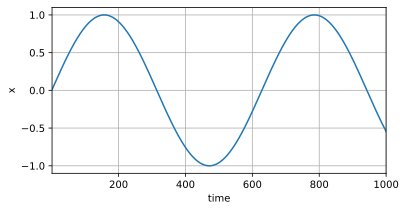

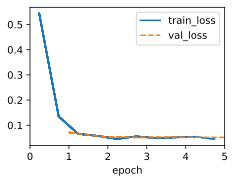

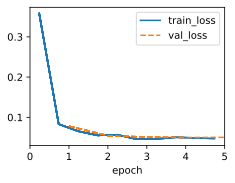

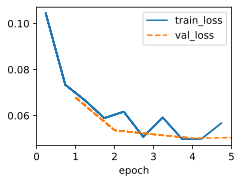

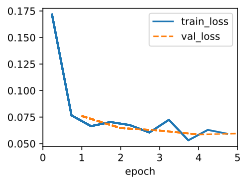

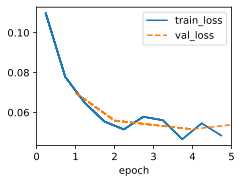

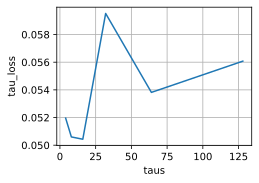

In [47]:
# Simulações para tau=4; tau=8; tau=16 e tau=32.
# def __init__(self, batch_size=16, T=1000, num_train=600, tau=32):

import torch
from torch import nn
from d2l import torch as d2l
import numpy as np

class Data(d2l.DataModule):
    def __init__(self, batch_size=16, T=1000, num_train=600, tau=4):
        self.save_hyperparameters()
        self.time = torch.arange(1, T + 1, dtype=torch.float32)       #  cria sequência de 1 até 1000.
        self.x = torch.sin(0.01 * self.time) + torch.randn(T) * 0.2   # cria a onda senoidal + ruido.

# data = Data()
d2l.plot(data.time, data.x, 'time', 'x', xlim=[1, 1000], figsize=(6, 3))



@d2l.add_to_class(Data)
def get_dataloader(self, train):
    features = [self.x[i : self.T-self.tau+i] for i in range(self.tau)]      # Sendo tau=600. Tem-se 600 listas com tensores com 400 elementos
    self.features = torch.stack(features, 1)                                 # converte as listas para um tensor(400,600)
    self.labels = self.x[self.tau:].reshape((-1, 1))                         # tensor (400,1)
    i = slice(0, self.num_train) if train else slice(self.num_train, None)
    return self.get_tensorloader([self.features, self.labels], train, i)

# -----------------------------------------------------------------------------------------------------------
# taus = [4, 8, 16, 32, 64]
taus = [4, 8, 16, 32, 64, 128]

tau_loss = []

for t in taus:
    data = Data(batch_size=16, T=1000, num_train=600, tau=t)
    model = d2l.LinearRegression(lr=0.01)
    trainer = d2l.Trainer(max_epochs=5)
    trainer.fit(model, data)
    onestep_preds = model(data.features[data.num_train:])
    tau_loss.append(model.loss(y_hat=onestep_preds, y=data.labels[data.num_train:]).item())

# -----------------------------------------------------------------------------------------------------------
# Possibilidades para x:
# x = np.arange(0,taus.__len__())
# x = torch.arange(0,taus.__len__())
# x = list(range(len(taus)))

# d2l.plot(x, tau_loss, 'x', 'tau_loss', figsize=(6, 3))
d2l.plot(taus, tau_loss, 'taus', 'tau_loss', figsize=(6, 3))


taus = [4, 8, 16, 32, 64, 128]

- melhor resultado para tau=16

In [48]:
tau_loss

[0.05195673555135727,
 0.05059800669550896,
 0.050431281328201294,
 0.05952225998044014,
 0.05381790176033974,
 0.056076616048812866]

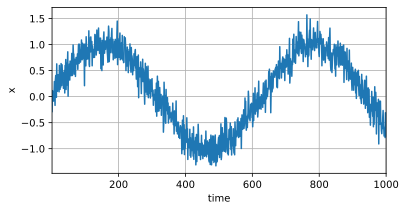

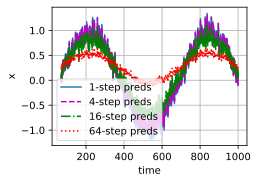

In [36]:
# Simulações para tau=4; tau=8; tau=16 e tau=32.
# def __init__(self, batch_size=16, T=1000, num_train=600, tau=32):

import torch
from torch import nn
from d2l import torch as d2l


class Data(d2l.DataModule):
    def __init__(self, batch_size=16, T=1000, num_train=600, tau=4):
        self.save_hyperparameters()
        self.time = torch.arange(1, T + 1, dtype=torch.float32)       #  cria sequência de 1 até 1000.
        self.x = torch.sin(0.01 * self.time) + torch.randn(T) * 0.2   # cria a onda senoidal + ruido.

data = Data()
d2l.plot(data.time, data.x, 'time', 'x', xlim=[1, 1000], figsize=(6, 3))



@d2l.add_to_class(Data)
def get_dataloader(self, train):
    features = [self.x[i : self.T-self.tau+i] for i in range(self.tau)]      # Sendo tau=600. Tem-se 600 listas com tensores com 400 elementos
    self.features = torch.stack(features, 1)                                 # converte as listas para um tensor(400,600)
    self.labels = self.x[self.tau:].reshape((-1, 1))                         # tensor (400,1)
    i = slice(0, self.num_train) if train else slice(self.num_train, None)
    return self.get_tensorloader([self.features, self.labels], train, i)

model = d2l.LinearRegression(lr=0.01)
trainer = d2l.Trainer(max_epochs=5)
trainer.fit(model, data)



onestep_preds = model(data.features).detach().numpy()
d2l.plot(data.time[data.tau:], [data.labels, onestep_preds], 'time', 'x',
         legend=['labels', '1-step preds'], figsize=(6, 3))


# -------------------------------------------------------------------------------------


def k_step_pred(k):
    features = []
    for i in range(data.tau):
        features.append(data.x[i : i+data.T-data.tau-k+1])
    # The (i+tau)-th element stores the (i+1)-step-ahead predictions
    for i in range(k):
        preds = model(torch.stack(features[i : i+data.tau], 1))
        features.append(preds.reshape(-1))
    return features[data.tau:]

steps = (1, 4, 16, 64)
preds = k_step_pred(steps[-1])
d2l.plot(data.time[data.tau+steps[-1]-1:],
         [preds[k - 1].detach().numpy() for k in steps], 'time', 'x',
         legend=[f'{k}-step preds' for k in steps], figsize=(6, 3))


Simulações para tau=4; tau=8; tau=16 e tau=32.

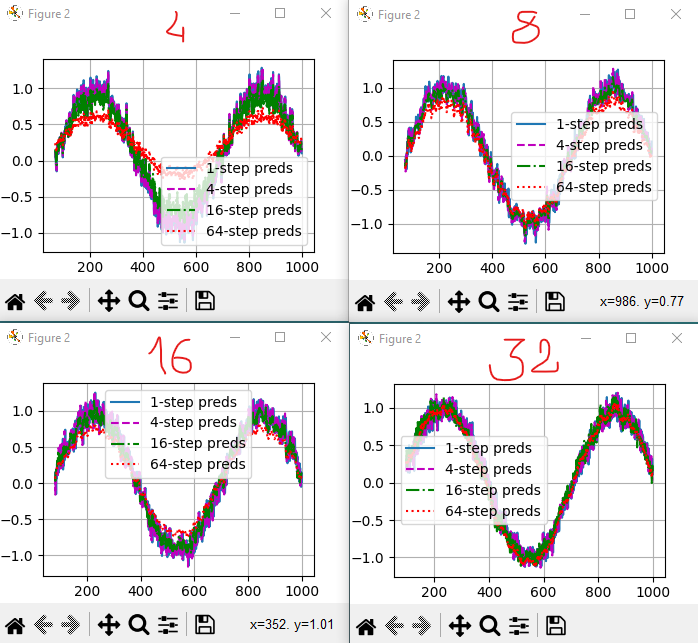

# 2. Quantas observações passadas você precisaria se não houvesse ruído? Dica: você pode escrever sen e cos como uma equação diferencial.

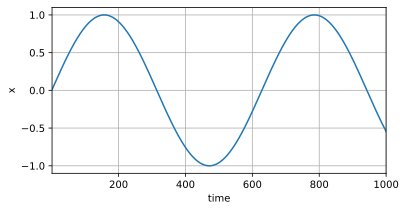

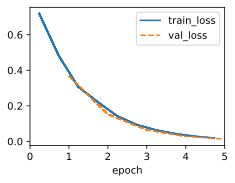

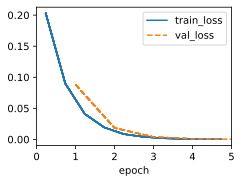

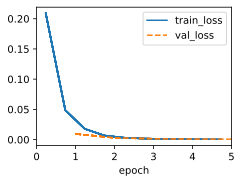

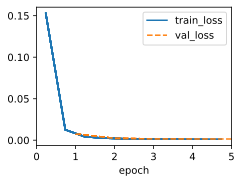

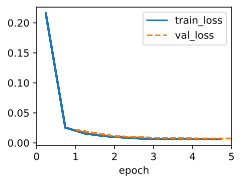

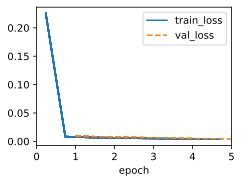

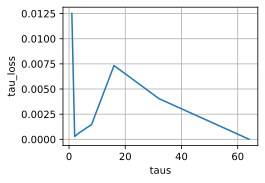

In [45]:
# Simulações para tau=4; tau=8; tau=16 e tau=32.
# def __init__(self, batch_size=16, T=1000, num_train=600, tau=32):

import torch
from torch import nn
from d2l import torch as d2l
import numpy as np

class Data(d2l.DataModule):
    def __init__(self, batch_size=16, T=1000, num_train=600, tau=1):
        self.save_hyperparameters()
        self.time = torch.arange(1, T + 1, dtype=torch.float32)       #  cria sequência de 1 até 1000.
        # self.x = torch.sin(0.01 * self.time) + torch.randn(T) * 0.2   # cria a onda senoidal + ruido.
        self.x = torch.sin(0.01 * self.time)

# data = Data()
d2l.plot(data.time, data.x, 'time', 'x', xlim=[1, 1000], figsize=(6, 3))



@d2l.add_to_class(Data)
def get_dataloader(self, train):
    features = [self.x[i : self.T-self.tau+i] for i in range(self.tau)]      # Sendo tau=600. Tem-se 600 listas com tensores com 400 elementos
    self.features = torch.stack(features, 1)                                 # converte as listas para um tensor(400,600)
    self.labels = self.x[self.tau:].reshape((-1, 1))                         # tensor (400,1)
    i = slice(0, self.num_train) if train else slice(self.num_train, None)
    return self.get_tensorloader([self.features, self.labels], train, i)

# -----------------------------------------------------------------------------------------------------------
taus = [1, 2, 4, 8, 16, 32, 64]

tau_loss = []

for t in taus:
    data = Data(batch_size=16, T=1000, num_train=600, tau=t)
    model = d2l.LinearRegression(lr=0.01)
    trainer = d2l.Trainer(max_epochs=5)
    trainer.fit(model, data)
    onestep_preds = model(data.features[data.num_train:])
    tau_loss.append(model.loss(y_hat=onestep_preds, y=data.labels[data.num_train:]).item())

# -----------------------------------------------------------------------------------------------------------
# Possibilidades para x:
# x = np.arange(0,taus.__len__())
# x = torch.arange(0,taus.__len__())
# x = list(range(len(taus)))

# d2l.plot(x, tau_loss, 'x', 'tau_loss', figsize=(6, 3))
d2l.plot(taus, tau_loss, 'taus', 'tau_loss', figsize=(6, 3))


taus = [1, 2, 4, 8, 16, 32, 64]
- melhores resultados: tau=2 e tau=64 (melhor)

In [46]:
tau_loss

[0.012503569014370441,
 0.0002954935480374843,
 0.000723726989235729,
 0.0014649067306891084,
 0.007330889347940683,
 0.004041041247546673,
 1.494840398663655e-05]

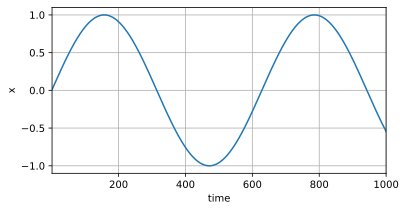

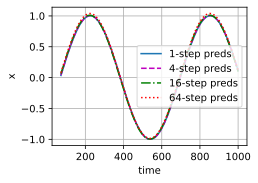

In [15]:
# Simulações para tau=1; tau=2; tau=4 e tau=8.
# def __init__(self, batch_size=16, T=1000, num_train=600, tau=32):

# Simulações para tau=4; tau=8; tau=16 e tau=32.
# def __init__(self, batch_size=16, T=1000, num_train=600, tau=32):

import torch
from torch import nn
from d2l import torch as d2l


class Data(d2l.DataModule):
    def __init__(self, batch_size=16, T=1000, num_train=600, tau=8):
        self.save_hyperparameters()
        self.time = torch.arange(1, T + 1, dtype=torch.float32)       #  cria sequência de 1 até 1000.
        # self.x = torch.sin(0.01 * self.time) + torch.randn(T) * 0.2   # cria a onda senoidal + ruido.
        self.x = torch.sin(0.01 * self.time)

data = Data()
d2l.plot(data.time, data.x, 'time', 'x', xlim=[1, 1000], figsize=(6, 3))



@d2l.add_to_class(Data)
def get_dataloader(self, train):
    features = [self.x[i : self.T-self.tau+i] for i in range(self.tau)]      # Sendo tau=600. Tem-se 600 listas com tensores com 400 elementos
    self.features = torch.stack(features, 1)                                 # converte as listas para um tensor(400,600)
    self.labels = self.x[self.tau:].reshape((-1, 1))                         # tensor (400,1)
    i = slice(0, self.num_train) if train else slice(self.num_train, None)
    return self.get_tensorloader([self.features, self.labels], train, i)

model = d2l.LinearRegression(lr=0.01)
trainer = d2l.Trainer(max_epochs=5)
trainer.fit(model, data)



onestep_preds = model(data.features).detach().numpy()
d2l.plot(data.time[data.tau:], [data.labels, onestep_preds], 'time', 'x',
         legend=['labels', '1-step preds'], figsize=(6, 3))


# -------------------------------------------------------------------------------------


def k_step_pred(k):
    features = []
    for i in range(data.tau):
        features.append(data.x[i : i+data.T-data.tau-k+1])
    # The (i+tau)-th element stores the (i+1)-step-ahead predictions
    for i in range(k):
        preds = model(torch.stack(features[i : i+data.tau], 1))
        features.append(preds.reshape(-1))
    return features[data.tau:]

steps = (1, 4, 16, 64)
preds = k_step_pred(steps[-1])
d2l.plot(data.time[data.tau+steps[-1]-1:],
         [preds[k - 1].detach().numpy() for k in steps], 'time', 'x',
         legend=[f'{k}-step preds' for k in steps], figsize=(6, 3))


Simulações para tau=1; tau=2; tau=4 e tau=8.

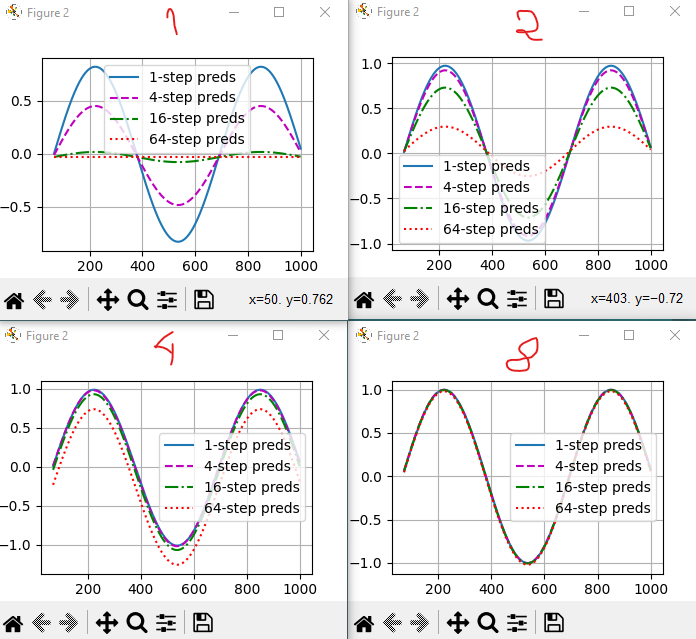

# 4. Altere a arquitetura da rede neural e avalie o desempenho. Você pode treinar o novo modelo com mais épocas. O que você observa?

Perda: 0.048019129782915115


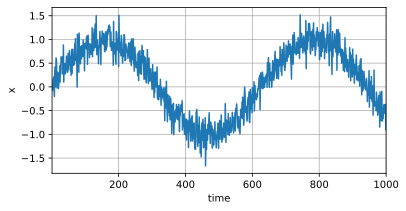

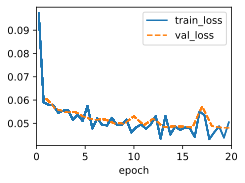

In [49]:
# Simulações para tau=4; tau=8; tau=16 e tau=32.
# def __init__(self, batch_size=16, T=1000, num_train=600, tau=32):

import torch
from torch import nn
from d2l import torch as d2l


class Data(d2l.DataModule):
    def __init__(self, batch_size=16, T=1000, num_train=600, tau=16):
        self.save_hyperparameters()
        self.time = torch.arange(1, T + 1, dtype=torch.float32)       #  cria sequência de 1 até 1000.
        self.x = torch.sin(0.01 * self.time) + torch.randn(T) * 0.2   # cria a onda senoidal + ruido.
        # self.x = torch.sin(0.01 * self.time)

data = Data()
d2l.plot(data.time, data.x, 'time', 'x', xlim=[1, 1000], figsize=(6, 3))



@d2l.add_to_class(Data)
def get_dataloader(self, train):
    features = [self.x[i : self.T-self.tau+i] for i in range(self.tau)]      # Sendo tau=600. Tem-se 600 listas com tensores com 400 elementos
    self.features = torch.stack(features, 1)                                 # converte as listas para um tensor(400,600)
    self.labels = self.x[self.tau:].reshape((-1, 1))                         # tensor (400,1)
    i = slice(0, self.num_train) if train else slice(self.num_train, None)
    return self.get_tensorloader([self.features, self.labels], train, i)

model = d2l.LinearRegression(lr=0.03)
trainer = d2l.Trainer(max_epochs=20)
trainer.fit(model, data)

onestep_preds = model(data.features[data.num_train:])
perda = model.loss(y_hat=onestep_preds, y=data.labels[data.num_train:]).item()
print(f'Perda: {perda}')

# onestep_preds = model(data.features).detach().numpy()
# d2l.plot(data.time[data.tau:], [data.labels, onestep_preds], 'time', 'x',
#          legend=['labels', '1-step preds'], figsize=(6, 3))
#
#
# # -------------------------------------------------------------------------------------
#
#
# def k_step_pred(k):
#     features = []
#     for i in range(data.tau):
#         features.append(data.x[i : i+data.T-data.tau-k+1])
#     # The (i+tau)-th element stores the (i+1)-step-ahead predictions
#     for i in range(k):
#         preds = model(torch.stack(features[i : i+data.tau], 1))
#         features.append(preds.reshape(-1))
#     return features[data.tau:]
#
# steps = (1, 4, 16, 64)
# preds = k_step_pred(steps[-1])
# d2l.plot(data.time[data.tau+steps[-1]-1:],
#          [preds[k - 1].detach().numpy() for k in steps], 'time', 'x',
#          legend=[f'{k}-step preds' for k in steps], figsize=(6, 3))


# Outras respostas:

https://pandalab.me/archives/working_with_sequences